In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

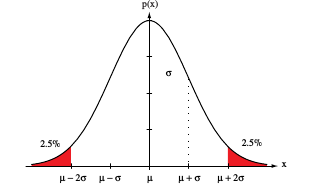

Fig.7: A univariate normal distribution has roughly 95% of its area in √ the range |x − µ| ≤ 2σ, as shown. The peak of the distribution has value p(µ) = 1/ 2πσ.

# Neyman-Pearson Criterion and Classifier Implementation

## 2.3.2 Neyman-Pearson Criterion

In some problems, we may wish to minimize the overall risk subject to a constraint. For instance, we might seek to minimize the total risk while ensuring:

$$
\int_{R(\alpha_i | x)} R(\alpha_i | x) \, dx < \text{constant}
$$

for some particular \( i \). This constraint may arise if a fixed resource accompanies a particular action \( \alpha_i \), or if misclassification from a certain state of nature \( \omega_i \) must not exceed a specified frequency. For example, suppose government regulations stipulate that no more than 1% of salmon should be misclassified as sea bass. The decision strategy would then aim to minimize the risk of classifying a sea bass as salmon under this condition.

Neyman-Pearson criteria often require numerical adjustment of decision boundaries. However, analytical solutions may be available for Gaussian or other specific distributions.

## Classifiers, Discriminant Functions, and Decision Surfaces

### The Multi-Category Case

Pattern classifiers can be represented by a set of discriminant functions \( g_i(x) \) for $ i = 1, \ldots, c \). The classifier assigns a feature vector \( x \) to class \( \omega_i \) if:

$$
g_i(x) > g_j(x) \quad \text{for all } j \neq i.
$$

This concept is visualized in the structure of a statistical pattern classifier network.

### Example Representation

A classifier receives input $ x = [x_1, x_2, \ldots, x_d] $, computes discriminant functions, and assigns the class corresponding to the maximum discriminant.

### Bayes Classifier Representation

A Bayes classifier can be represented with:

$$
g_i(x) = -R(\alpha_i | x)
$$

where the maximum discriminant function corresponds to the minimum conditional risk. For minimum-error-rate classification:

$$
g_i(x) = P(\omega_i | x)
$$

so the decision rule selects the maximum posterior probability. The choice of discriminant functions can be modified without affecting classification by:

$$
g_i(x) = f(g_i(x))
$$

where $ f(\cdot) $ is a monotonically increasing function. This leads to the following equivalent forms:

$$
g_i(x) = \frac{p(x|\omega_i)P(\omega_i)}{\sum_{j=1}^{c} p(x|\omega_j)P(\omega_j)}
$$

or

$$
g_i(x) = p(x|\omega_i)P(\omega_i)
$$

or

$$
g_i(x) = \ln p(x|\omega_i) + \ln P(\omega_i).
$$

These forms simplify analysis and computation while maintaining equivalent classification results.

### Decision Regions and Boundaries

The decision rules divide the feature space into regions $ R_1, R_2, \ldots, R_c $. A feature vector $ x $ belongs to region $ R_i $ if:

$$
g_i(x) > g_j(x) \quad \text{for all } j \neq i.
$$

Decision boundaries are the surfaces where discriminant functions tie.

### Visualization of Decision Boundaries

For Gaussian distributions, decision boundaries may be hyperbolic, leading to non-simply connected decision regions.

### 2.4.2 The Two-Category Case

While the two-category case is just a special instance of the multicategory case, it has traditionally received separate treatment. Indeed, a classifier that places a pattern in one of only two categories has a special name — a **dichotomizer**. Instead of using two dichotomizing discriminant functions $ g_1 $ and $ g_2 $ and assigning $ x $ to $ \omega_1 $ if $ g_1 > g_2 $, it is more common to define a single discriminant function:

$$
g(x) \equiv g_1(x) - g_2(x),
$$

and to use the following decision rule: Decide $ \omega_1 $ if $ g(x) > 0 $; otherwise decide $ \omega_2 $. Thus, a dichotomizer can be viewed as a machine that computes a single discriminant function $ g(x) $, and classifies $ x $ according to the algebraic sign of the result. 

Of the various forms in which the minimum-error-rate discriminant function can be written, the following two (derived from Eqs. 25 & 27) are particularly convenient:

$$
g(x) = P(\omega_1 | x) - P(\omega_2 | x)
$$

and

$$
g(x) = \ln \frac{p(x|\omega_1) P(\omega_1)}{p(x|\omega_2) P(\omega_2)}.
$$

## The Normal Density

The structure of a Bayes classifier is determined by the conditional densities $ p(x|\omega_i) $ as well as by the prior probabilities. Of the various density functions that have been investigated, none has received more attention than the multivariate normal or Gaussian density. 

To a large extent, this attention is due to its analytical tractability. However, the multivariate normal density is also an appropriate model for an important situation, viz., the case where the feature vectors $ x $ for a given class $ \omega_i $ are continuous valued, randomly corrupted versions of a single typical or prototype vector $ \mu_i $. 

###  Univariate Density

We begin with the continuous univariate normal or Gaussian density:

$$
p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right),
$$

for which the expected value of $ x $ (an average, here taken over the feature space) is:

$$
\mu \equiv E[x] = \int_{-\infty}^{\infty} x p(x) \, dx.
$$

The expected squared deviation or variance is:

$$
\sigma^2 \equiv E[(x - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 p(x) \, dx.
$$

The univariate normal density is completely specified by two parameters: its mean $ \mu $ and variance $ \sigma^2 $. For simplicity, we often abbreviate the representation by writing $ p(x) \sim N(\mu, \sigma^2) $ to say that $ x $ is distributed normally with mean $ \mu $ and variance $ \sigma^2 $.

Samples from normal distributions tend to cluster about the mean, with a spread related to the standard deviation \( \sigma \).

The relationship between the normal distribution and entropy is noteworthy. The entropy of a distribution is given by:

$$
H(p(x)) = -\int p(x) \ln p(x) \, dx,
$$

and is measured in nats. If a logarithm base 2 is used instead, the unit is the bit. The entropy is a non-negative quantity that describes the fundamental uncertainty in the values of points selected randomly from a distribution. 

It can be shown that the normal distribution has the maximum entropy of all distributions having a given mean and variance. Moreover, as stated by the Central Limit Theorem, the aggregate effect of a large number of small, independent random disturbances will lead to a Gaussian distribution. 

Because many patterns — from fish to handwritten characters to some speech sounds — can be viewed as some ideal or prototype pattern corrupted by a large number of random processes, the Gaussian is often a good model for the actual probability distribution.


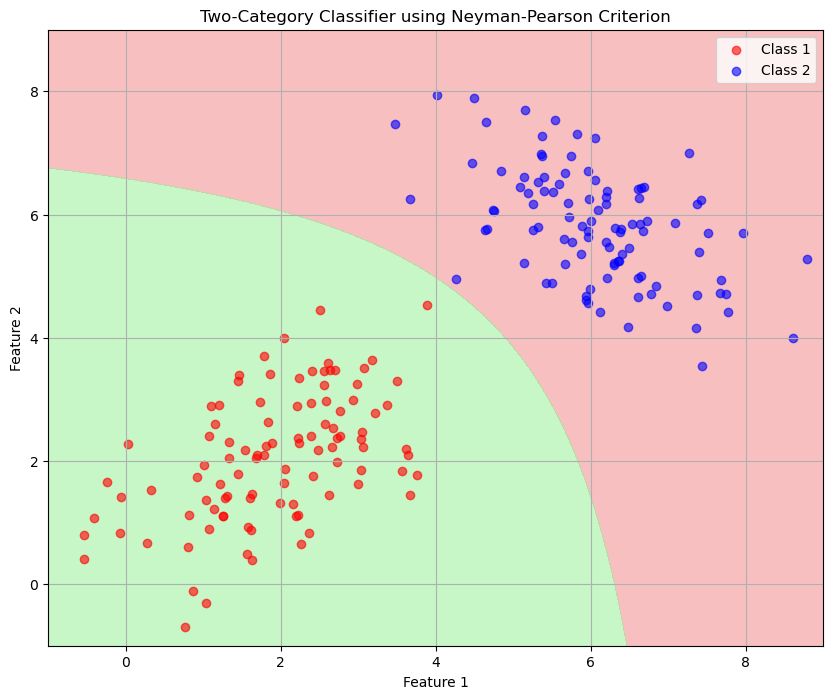

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
N = 100  # Number of samples per class

# Class 1: mean = 2, variance = 1
mean1 = np.array([2, 2])
cov1 = np.array([[1, 0.5], [0.5, 1]])
class1_samples = np.random.multivariate_normal(mean1, cov1, N)

# Class 2: mean = 6, variance = 1
mean2 = np.array([6, 6])
cov2 = np.array([[1, -0.5], [-0.5, 1]])
class2_samples = np.random.multivariate_normal(mean2, cov2, N)

# Combine samples and labels
X = np.vstack((class1_samples, class2_samples))
y = np.array([0] * N + [1] * N)

# Compute means and covariances
mean1_est = np.mean(class1_samples, axis=0)
mean2_est = np.mean(class2_samples, axis=0)

# Function to compute the discriminant function g(x)
def discriminant_function(x):
    p_x_given_class1 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov1)))) * \
                       np.exp(-0.5 * (x - mean1_est).T @ np.linalg.inv(cov1) @ (x - mean1_est))
    
    p_x_given_class2 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov2)))) * \
                       np.exp(-0.5 * (x - mean2_est).T @ np.linalg.inv(cov2) @ (x - mean2_est))
    
    return p_x_given_class1, p_x_given_class2

# Create a grid for decision boundary visualization
x1_range = np.linspace(-1, 9, 200)
x2_range = np.linspace(-1, 9, 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Evaluate the discriminant function on the grid
g_values = np.array([discriminant_function(point) for point in grid_points])
g_class1 = g_values[:, 0]
g_class2 = g_values[:, 1]

# Decision boundary: g(x) = 0
g_diff = g_class1 - g_class2
g_diff = g_diff.reshape(xx1.shape)

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(xx1, xx2, g_diff, levels=[-1, 0, 1], colors=['lightcoral', 'lightgreen'], alpha=0.5)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='red', label='Class 1', alpha=0.6)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='blue', label='Class 2', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two-Category Classifier using Neyman-Pearson Criterion')
plt.legend()
plt.grid()
plt.show()


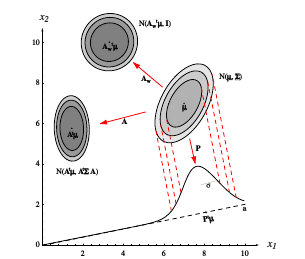

Fig.8: The action of a linear transformation on the feature space will convert an arbitrary normal distribution into another normal distribution. One transformation, A, takes the source distribution into distribution N (At µ, At ΣA). Another linear transformation — a projection P onto line a — leads to N (µ, σ 2 ) measured along a. While the transforms yield distributions in a diﬀerent space, we show them super- imposed on the original x1 − x2 space. A whitening transform leads to a circularly symmetric Gaussian, here shown displaced.

## Multivariate Density

The general multivariate normal density in $ d $ dimensions is given by:

$$
p(x) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right), \tag{37}
$$

where:
- $ x $ is a $ d $-component column vector,
- $ \mu $ is the $ d $-component mean vector,
- $ \Sigma $ is the $ d \times d $ covariance matrix,
- $ |\Sigma| $ and $ \Sigma^{-1} $ are the determinant and inverse of $ \Sigma $, respectively, and
- $ (x - \mu)^T $ is the transpose of $ (x - \mu) $.

For simplicity, we often abbreviate Eq. (37) as $ p(x) \sim N(\mu, \Sigma) $.

Formally, we have:

$$
\mu \equiv E[x] = \int_{-\infty}^{\infty} x p(x) \, dx, \tag{39}
$$

and

$$
\Sigma \equiv E[(x - \mu)(x - \mu)^T] = \int_{-\infty}^{\infty} (x - \mu)(x - \mu)^T p(x) \, dx. \tag{40}
$$

The expected value of a vector or a matrix is computed by taking the expected values of its components. Thus, if $ x_i $ is the $ i $-th component of $ x $, $ \mu_i $ the $ i $-th component of $ \mu $, and $ \sigma_{ij} $ the $ ij $-th component of $ \Sigma $, then:

$$
\mu_i = E[x_i], \tag{41}
$$

and

$$
\sigma_{ij} = E[(x_i - \mu_i)(x_j - \mu_j)]. \tag{42}
$$

The covariance matrix $ \Sigma $ is always symmetric and positive semidefinite. We focus on cases where $ \Sigma $ is positive definite, ensuring a strictly positive determinant.

- The diagonal elements $ \sigma_{ii} $ are the variances of the respective $ x_i $ (i.e., $ \sigma_i^2 $).
- The off-diagonal elements $ \sigma_{ij} $ are the covariances between $ x_i $ and $ x_j $.

If $ x_i $ and $ x_j $ are statistically independent, then $ \sigma_{ij} = 0 $. If all off-diagonal elements are zero, $ p(x) $ reduces to the product of the univariate normal densities for the components of $ x $.

Linear combinations of jointly normally distributed random variables, whether independent or not, are also normally distributed. Specifically, if $ A $ is a $d \times k $ matrix and $ y = A^T x $ is a $ k $-component vector, then:

$$
p(y) \sim N(A^T \mu, A^T \Sigma A). \tag{43}
$$

In the special case where $ k = 1 $ and $ A $ is a unit-length vector $ a $, $ y = a^T x $ represents the projection of $ x $ onto a line in the direction of $ a $; in this case, $ a^T \Sigma a $ is the variance of the projection of $ x $ onto $ a $.

Knowing the covariance matrix allows us to calculate the dispersion of the data in any direction or subspace. A coordinate transformation can convert an arbitrary multivariate normal distribution into a spherical one, which has a covariance matrix proportional to the identity matrix $ I $. If we define $ \Phi $ as the matrix whose columns are the orthonormal eigenvectors of $ \Sigma $, and $ \Lambda $ as the diagonal matrix of the corresponding eigenvalues, then the transformation $ Aw = \Phi \Lambda^{-1/2} $ applied to the coordinates ensures that the transformed distribution has a covariance matrix equal to the identity matrix. In signal processing, the transform $ Aw $ is referred to as a whitening transformation since it makes the spectrum of eigenvectors of the transformed distribution uniform.

The multivariate normal density is fully specified by $ d + \frac{d(d + 1)}{2} $ parameters — the elements of the mean vector $ \mu $ and the independent elements of the covariance matrix $ \Sigma $. 

Samples drawn from a normal population tend to cluster around a central point. The center of the cluster is determined by the mean vector, and the shape is determined by the covariance matrix. 

It follows from Eq. (37) that loci of points of constant density are hyperellipsoids, for which the quadratic form 

$$
(x - \mu)^T \Sigma^{-1} (x - \mu) \text{ is constant.} \tag{44}
$$

The principal axes of these hyperellipsoids are given by the eigenvectors of $ \Sigma $ (described by $ \Phi $); the eigenvalues (described by $ \Lambda $) determine the lengths of these axes. The quantity 

$$
r^2 = (x - \mu)^T \Sigma^{-1} (x - \mu) \tag{45}
$$

is sometimes called the squared Mahalanobis distance from $ x $ to $ \mu $. Thus, contours of constant density are hyperellipsoids of constant Mahalanobis distance to $ \mu $, and the volume of these hyperellipsoids measures the scatter of samples around the mean.

The volume of the hyperellipsoid corresponding to a Mahalanobis distance $ r $ is given by:

$$
V = V_d |\Sigma|^{1/2} r^d, \tag{46}
$$

where $ V_d $ is the volume of a $ d $-dimensional unit hypersphere:

$$
V_d = 
\begin{cases} 
\frac{\pi^{d/2}}{\Gamma(\frac{d}{2} + 1)} & \text{for } d \text{ even} \\ 
2^{d/2} \frac{\pi^{(d-1)/2}}{\Gamma(\frac{d-1}{2} + 1)} & \text{for } d \text{ odd} 
\end{cases} \tag{47}
$$


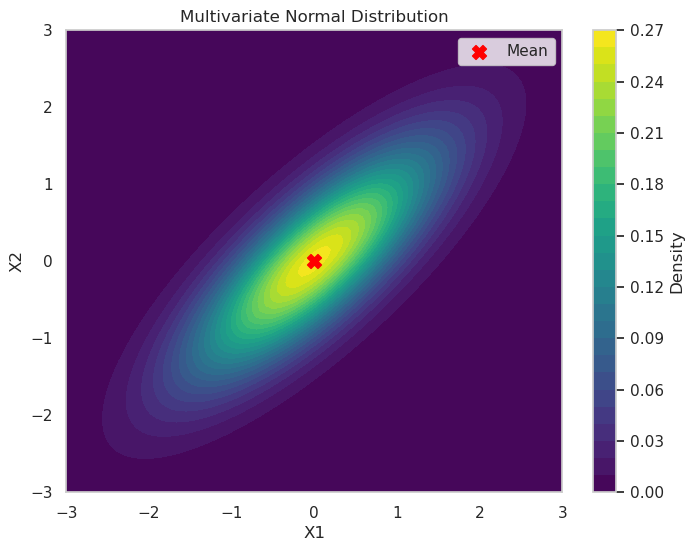

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to compute the multivariate normal density
def multivariate_normal_density(x, mu, cov):
    """
    Computes the multivariate normal density at points x given mean mu and covariance matrix cov.
    
    Args:
    x : ndarray
        The input points (each row is a point).
    mu : ndarray
        The mean vector of the distribution.
    cov : ndarray
        The covariance matrix of the distribution.
        
    Returns:
    ndarray
        The computed density values at each point in x.
    """
    d = len(mu)
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
    x_mu = x - mu
    inv_cov = np.linalg.inv(cov)
    result = np.exp(-0.5 * np.einsum('...k,kl,...l->...', x_mu, inv_cov, x_mu))
    return norm_const * result

# Parameters for the distribution
mu = np.array([0, 0])  # Mean
cov = np.array([[1, 0.8], [0.8, 1]])  # Covariance matrix

# Create a grid of points
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
pos = np.dstack((x1, x2))

# Calculate the multivariate normal density
Z = multivariate_normal_density(pos, mu, cov)

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
plt.contourf(x1, x2, Z, levels=30, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(mu[0], mu[1], color='red', s=100, label='Mean', marker='X')
plt.legend()
plt.show()
